In [2]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [3]:
    "0x430c8c4a0a8f1c5a9de3576dcd153dd2b68c0d67",
    "0x3183ace137a96108292e58df284bbaaa6bca3b8a",
    "0x6d191737f9653a66d0e8236fff6e8ea543c05bc0",
    "0x8b1396f754b83afa1d06d273d5915d573b4f04ee",
    "0xf537776e58076ec7f50fe945c9384480816daa6d",
    "0x185737db359230898bf324d07de25160c71948b2",
    "0x1488bcfff8f7edd8286bf9549a76c8c7f10c829f",
    "0xfcbb6faac5f65ffe74e32ef4896b7ae5f5b35f0f",
    "0xa0b9faac81f34a849d57516a0193b37ec23e70b8",
    "0x1a5918dd41efcc34aba03c40b86242d10bc398fa",
    "0x1111e3ef0b6ae32e14a55e0e7cd9b8505177c2bf",
    "0xb16c60e0a93b73cd96bca5b0811715146b3f6fb4",
    "0x26a474cd0448b0d46487c811069b87a1f6d5dad6",
    "0xac411ce0f1a294544eee0922bfdfb64459301822",
    "0x89639b0c40b8517145d238df4a5a83247ebb66a5",
    "0x276bf434613bd8cb5c8b3282ec6445c9370e33fa",
    "0xd51ce9be4a1cb6185b76ba825c59236a6cf5ca2a",
    "0x3cfee83db8ddddc463c98d1224825a70de14a601",
    "0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497"

'0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497'

In [26]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

# Wallet addresses
wallet_addresses = [
"0x6ae04d64c0fd3bd5bae3150c763c7d7beb851c0d",
"0xedC6BacdC1e29D7c5FA6f6ECA6FDD447B9C487c9",
"0xabc74170f3Cb8Ab352820C39cC1d1e05cE9e41D3"


]

# Etherscan API key
api_key = "5DSDMCYD46MENP7TZPUUDYBIDH1A2U6GB5"

# Define start and end block variables
start_block = 0  # Replace with the actual start block number
end_block = 999999999999  # Replace with the actual end block number

def get_token_transfers(wallet_address):
    url = f"https://api.etherscan.io/api"
    params = {
        "module": "account",
        "action": "tokentx",
        "address": wallet_address,
        "startblock": start_block,
        "endblock": end_block,
        "sort": "asc",
        "apikey": api_key,
    }
    response = requests.get(url, params=params)
    data = response.json()
    if data["status"] == "1":
        return data["result"]
    else:
        return []

# Pulling token transfer data for each wallet
all_token_transfers = []

for wallet in wallet_addresses:
    print(f"Pulling token transfers for wallet: {wallet}")
    token_transfers = get_token_transfers(wallet)
    all_token_transfers.extend(token_transfers)
    time.sleep(1)  # To avoid hitting rate limits

# Creating DataFrame from token transfers
df = pd.DataFrame(all_token_transfers)


Pulling token transfers for wallet: 0x6ae04d64c0fd3bd5bae3150c763c7d7beb851c0d
Pulling token transfers for wallet: 0xedC6BacdC1e29D7c5FA6f6ECA6FDD447B9C487c9
Pulling token transfers for wallet: 0xabc74170f3Cb8Ab352820C39cC1d1e05cE9e41D3


In [27]:
df

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,18479794,1698872351,0x0934c51b44ca7c589ac0073ebc7841c0ac2462365511...,1023571,0x311594ed63a9dc69c25de5746eaccb72a05d6d22bac8...,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0xdac17f958d2ee523a2206206994597c13d831ec7,0x6ae04d64c0fd3bd5bae3150c763c7d7beb851c0d,74974883,Tether USD,USDT,6,107,2000000,51860172670,385605,10512411,deprecated,2844641
1,13191681,1631192623,0x66e67909a32c02e904867704bd7a0a7ee78739594d38...,91996,0x498c44b505b6f8e0a361ce9ff6829a48c88707946ca3...,0x95b564f3b3bae3f206aa418667ba000afafacc8a,0xdac17f958d2ee523a2206206994597c13d831ec7,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,1000000,Tether USD,USDT,6,200,250000,141741969029,63197,23704548,deprecated,8132755
2,13191683,1631192664,0xd56245f308b30a911dc7584a6f8c5d2e6ee6ce8817e9...,91997,0x7581df66f98c5760e81c3fd283301818b512783b5a89...,0x95b564f3b3bae3f206aa418667ba000afafacc8a,0xbf2179859fc6d5bee9bf9158632dc51678a4100e,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,1000000000000000000,ELF,ELF,18,44,250000,155624912859,54452,2719870,deprecated,8132753
3,13191687,1631192681,0xd72295d4e1dc94d77663a41cc423b1576a9033f41488...,91998,0x214403d5dc11886544879dbb73addd113a52b1b97111...,0x95b564f3b3bae3f206aa418667ba000afafacc8a,0x6c6ee5e31d828de241282b9606c8e98ea48526e2,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,1000000000000000000,HoloToken,HOT,18,63,250000,137591603647,54417,3085716,deprecated,8132749
4,13191688,1631192698,0xfa8f45b31a432daf31c72a3b2ddfd280e51c98b0ad25...,91999,0x4cc1a0762a294f27a81a49faac233630cb072dc97f76...,0x95b564f3b3bae3f206aa418667ba000afafacc8a,0x744d70fdbe2ba4cf95131626614a1763df805b9e,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,1000000000000000000,StatusNetwork,SNT,18,175,250000,121993521393,119675,12315818,deprecated,8132748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11548,11515519,1608802464,0xe4e852ca651151ecbe864d89877f017bd89ef0f6019f...,1,0x26ce0c9071969aaa7cb776994ed66d65072dd6f683b6...,0x9acbb72cf67103a30333a32cd203459c6a9c3311,0x514910771af9ca656af840dff83e8264ecf986ca,0xabc74170f3cb8ab352820c39cc1d1e05ce9e41d3,1000000000000000000,ChainLink Token,LINK,18,161,36577,61000000000,36577,10469493,deprecated,9808917
11549,11535894,1609073123,0xd7c7e3ff93fb2d8c1548812833e2ba9279304fd9a8fc...,12676,0x3ba8ac69fa3c4645d916195133a11b6462770b5129a1...,0xabc74170f3cb8ab352820c39cc1d1e05ce9e41d3,0x6c6ee5e31d828de241282b9606c8e98ea48526e2,0x9acbb72cf67103a30333a32cd203459c6a9c3311,66973336267100000000000000,HoloToken,HOT,18,230,100000,130350000000,38365,11053864,deprecated,9788542
11550,11535896,1609073174,0x901313c802532634759460243888256025b1524c2902...,12677,0x293a3faba7851c5a6456f5116f743324fa651cf97b5e...,0xabc74170f3cb8ab352820c39cc1d1e05ce9e41d3,0x514910771af9ca656af840dff83e8264ecf986ca,0xa23cbcdfafd09de2ce793d0a08f51865885be3f5,8140000000000000000,ChainLink Token,LINK,18,179,100000,130350000000,36577,8607208,deprecated,9788540
11551,11541724,1609149175,0xa4a61bcb9a0b85f04cf453be2cada001c128084e298d...,5837,0xb3ad2b7d4b7e18aacc71defd3dfe4d4e6c842a3a6889...,0x9acbb72cf67103a30333a32cd203459c6a9c3311,0xdac17f958d2ee523a2206206994597c13d831ec7,0xabc74170f3cb8ab352820c39cc1d1e05ce9e41d3,1000000,Tether USD,USDT,6,89,90000,96000000000,56197,4062448,deprecated,9782712


In [28]:
# Ensure we only keep necessary columns
df = df[["timeStamp", "hash", "from", "contractAddress", "to",  "tokenName", "tokenSymbol", "value"]]
df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit='s')

# Define seven_days_ago variable
seven_days_ago = pd.Timestamp.now() - pd.Timedelta(days=7)

# Filtering token transactions within the past 1 days
df = df[df["timeStamp"] >= seven_days_ago]

/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_73931/3816293258.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit='s')
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_73931/3816293258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit='s')


In [29]:
df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value
7619,2024-11-26 15:45:04,0x2588fe5c4b5dfe101a6463f6cd0789547af6260fa574...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x6982508145454ce325ddbe47a25d4ec3d2311933,0xb2170202b050f0549b9d9733f8258bc917346f98,Pepe,PEPE,55000000000000000000000000000
7620,2024-11-26 16:06:24,0xdd0b0b1cbd63fa9d3125cfbbc7e17bb673551fbfb10d...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x4e15361fd6b4bb609fa63c81a2be19d873717870,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Fantom Token,FTM,477980010000000000000000
7621,2024-11-26 16:08:32,0xf62d583beec60bfd53f81318e865fb9653cd8d81e417...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x4cc19356f2d37338b9802aa8e8fc58b0373296e7,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,SelfKey,KEY,40000000000000000000000000
7622,2024-11-26 16:12:48,0x72eeb9b729ea5ddfef5ae98d8e1a7f5358637d15d2c6...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x57e114b691db790c35207b2e685d4a43181e6061,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Ethena,ENA,70000000000000000000000
7623,2024-11-26 16:14:56,0xd77379487d65e5bc9c4f2cb45f45ee7c931d794cacfd...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x455e53cbb86018ac2b8092fdcd39d8444affc3f6,0x4fca851027b52ddcc7bbfad327a31287a00026e7,Polygon Ecosystem Token,POL,857565266927066754414145
...,...,...,...,...,...,...,...,...
7731,2024-12-03 15:21:36,0x3f9d5ad910e80effa086c926d752e4ecc652a39d55de...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x320623b8e4ff03373931769a31fc52a4e78b5d70,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Reserve Rights,RSR,52000000000000000000000000
7732,2024-12-03 15:49:20,0xa5d3a7d582c0534a7b63a6f48cc0c09b70a3d9ed0a88...,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,0x163f8c2467924be0ae7b5347228cabf260318753,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,Worldcoin,WLD,87244250000000000000000
7733,2024-12-03 16:04:16,0xf2587fef1cb26f5ff2bbd1ed69e113645fbad9b5fe5b...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x720cd16b011b987da3518fbf38c3071d4f0d1495,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Flux,FLUX,7000000000000
7734,2024-12-03 16:10:40,0xe3ccea13e1438d4a6e5d2c7f34ea91c56e4448f50020...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x514910771af9ca656af840dff83e8264ecf986ca,0xb2170202b050f0549b9d9733f8258bc917346f98,ChainLink Token,LINK,60000000000000000000000


In [30]:
api_columns = [
    "price",  "price5m", "variation5m", 
    "price1h", "variation1h", 
    "price6h", "variation6h", 
    "price24h", "variation24h"
]

# Set up API request
headers = {
    "accept": "application/json",
    "x-api-key": "uo9IKArCoh5aH9tNo3OBj6JwaQhjuuFLaWxLNuOW"
}

def get_token_data(contract_address):
    url = f"https://public-api.dextools.io/trial/v2/token/ether/{contract_address}/price"
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        
        if 'data' in data and data['data']:
            # Extract only the specified metrics
            token_data = {col: data['data'].get(col, None) for col in api_columns}
            # Check if any data is missing and log it
            missing_data = [col for col, value in token_data.items() if value is None]
            if missing_data:
                print(f"Missing data for {contract_address}: {missing_data}")
            return token_data
        else:
            print(f"No data returned for {contract_address}. Response content: {data}")
            return {col: None for col in api_columns}
            
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {contract_address}: {e}")
        return {col: None for col in api_columns}
    
    # Add rate limiting
    time.sleep(1)

# Process each unique contract in the DataFrame
unique_contracts = df['contractAddress'].str.lower().unique()
for contract in unique_contracts:
    token_data = get_token_data(contract)
    
    # Update DataFrame with token data
    for col, value in token_data.items():
        df.loc[df['contractAddress'].str.lower() == contract, f'dextools_{col}'] = value

# Convert columns to numeric
for col in [f'dextools_{c}' for c in api_columns]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Missing data for 0x4e15361fd6b4bb609fa63c81a2be19d873717870: ['price5m', 'variation5m']
Error fetching data for 0x4cc19356f2d37338b9802aa8e8fc58b0373296e7: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x4cc19356f2d37338b9802aa8e8fc58b0373296e7/price
Error fetching data for 0x57e114b691db790c35207b2e685d4a43181e6061: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x57e114b691db790c35207b2e685d4a43181e6061/price
Error fetching data for 0x455e53cbb86018ac2b8092fdcd39d8444affc3f6: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x455e53cbb86018ac2b8092fdcd39d8444affc3f6/price
Error fetching data for 0xbf2179859fc6d5bee9bf9158632dc51678a4100e: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0xbf2179859fc6d5bee9bf9158632dc51678a4100e/price
Error fetching data for 0xcf0c122c6b73ff809c693db761e7ba

In [31]:
# Define the columns we want to capture from the info API endpoint
info_columns = [
    "circulatingSupply", "totalSupply", "mcap", "fdv", "holders"
]

def get_token_info(contract_address):
    url = f"https://public-api.dextools.io/trial/v2/token/ether/{contract_address}/info"
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        
        if 'data' in data and data['data']:
            # Extract only the specified metrics
            token_info = {col: data['data'].get(col, None) for col in info_columns}
            # Check if any data is missing and log it
            missing_data = [col for col, value in token_info.items() if value is None]
            if missing_data:
                print(f"Missing info data for {contract_address}: {missing_data}")
            return token_info
        else:
            print(f"No info data returned for {contract_address}. Response content: {data}")
            return {col: None for col in info_columns}
            
    except requests.exceptions.RequestException as e:
        print(f"Error fetching info data for {contract_address}: {e}")
        return {col: None for col in info_columns}
    
    # Add rate limiting
    time.sleep(1)

# Process each unique contract in the DataFrame
unique_contracts = df['contractAddress'].str.lower().unique()
for contract in unique_contracts:
    token_info = get_token_info(contract)
    
    # Update DataFrame with token info
    for col, value in token_info.items():
        df.loc[df['contractAddress'].str.lower() == contract, f'dextools_{col}'] = value

# Convert columns to numeric
for col in [f'dextools_{c}' for c in info_columns]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Missing info data for 0x4e15361fd6b4bb609fa63c81a2be19d873717870: ['circulatingSupply', 'mcap']
Error fetching info data for 0x80c62fe4487e1351b47ba49809ebd60ed085bf52: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x80c62fe4487e1351b47ba49809ebd60ed085bf52/info
Error fetching info data for 0x7420b4b9a0110cdc71fb720908340c03f9bc03ec: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x7420b4b9a0110cdc71fb720908340c03f9bc03ec/info
Error fetching info data for 0x467719ad09025fcc6cf6f8311755809d45a5e5f3: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x467719ad09025fcc6cf6f8311755809d45a5e5f3/info
Error fetching info data for 0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783/info
Error fetching info data for 0xe

In [40]:
def get_token_info(contract_address):
    url = f"https://public-api.dextools.io/trial/v2/token/ether/{contract_address}/info"
    
    try:
        # Add exponential backoff retry logic
        max_retries = 3
        retry_delay = 5  # Start with 5 seconds
        
        for attempt in range(max_retries):
            response = requests.get(url, headers=headers)
            
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and data['data']:
                    token_info = {col: data['data'].get(col, None) for col in info_columns}
                    return token_info
                else:
                    print(f"No info data returned for {contract_address}")
                    return {col: None for col in info_columns}
            
            elif response.status_code == 429:  # Too Many Requests
                if attempt < max_retries - 1:  # Don't sleep on last attempt
                    sleep_time = retry_delay * (2 ** attempt)  # Exponential backoff
                    print(f"Rate limit hit, waiting {sleep_time} seconds...")
                    time.sleep(sleep_time)
                    continue
            
            else:
                print(f"Error {response.status_code} for {contract_address}")
                return {col: None for col in info_columns}
                
    except requests.exceptions.RequestException as e:
        print(f"Error fetching info data for {contract_address}: {e}")
        return {col: None for col in info_columns}
    
    # Add longer delay between successful requests
    time.sleep(2)

# Process contracts in smaller batches
batch_size = 5
for i in range(0, len(unique_contracts), batch_size):
    batch = unique_contracts[i:i+batch_size]
    print(f"Processing batch {i//batch_size + 1}/{len(unique_contracts)//batch_size + 1}")
    
    for contract in batch:
        token_info = get_token_info(contract)
        
        # Update DataFrame with token info
        for col, value in token_info.items():
            df.loc[df['contractAddress'].str.lower() == contract, f'dextools_{col}'] = value
    
    # Add delay between batches
    time.sleep(10)  # Wait 10 seconds between batches

Processing batch 1/10
Rate limit hit, waiting 5 seconds...
Processing batch 2/10
Processing batch 3/10
Processing batch 4/10
Processing batch 5/10
Processing batch 6/10
Processing batch 7/10
Processing batch 8/10
Processing batch 9/10
Processing batch 10/10


In [46]:
def get_token_data(contract_address):
    url = f"https://public-api.dextools.io/trial/v2/token/ether/{contract_address}/price"
    
    try:
        # Add exponential backoff retry logic
        max_retries = 3
        retry_delay = 5  # Start with 5 seconds
        
        for attempt in range(max_retries):
            response = requests.get(url, headers=headers)
            
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and data['data']:
                    # Extract only the specified metrics
                    token_data = {col: data['data'].get(col, None) for col in api_columns}
                    # Check if any data is missing and log it
                    missing_data = [col for col, value in token_data.items() if value is None]
                    if missing_data:
                        print(f"Missing data for {contract_address}: {missing_data}")
                    return token_data
                else:
                    print(f"No data returned for {contract_address}")
                    return {col: None for col in api_columns}
            
            elif response.status_code == 429:  # Too Many Requests
                if attempt < max_retries - 1:  # Don't sleep on last attempt
                    sleep_time = retry_delay * (2 ** attempt)  # Exponential backoff
                    print(f"Rate limit hit, waiting {sleep_time} seconds...")
                    time.sleep(sleep_time)
                    continue
            
            else:
                print(f"Error {response.status_code} for {contract_address}")
                return {col: None for col in api_columns}
                
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {contract_address}: {e}")
        return {col: None for col in api_columns}
    
    # Add longer delay between successful requests
    time.sleep(2)

# Process contracts in smaller batches
batch_size = 5
unique_contracts = df['contractAddress'].str.lower().unique()

for i in range(0, len(unique_contracts), batch_size):
    batch = unique_contracts[i:i+batch_size]
    print(f"Processing batch {i//batch_size + 1}/{len(unique_contracts)//batch_size + 1}")
    
    for contract in batch:
        token_data = get_token_data(contract)
        
        # Update DataFrame with token data
        for col, value in token_data.items():
            df.loc[df['contractAddress'].str.lower() == contract, f'dextools_{col}'] = value
    
    # Add delay between batches
    time.sleep(10)  # Wait 10 seconds between batches

# Convert columns to numeric
for col in [f'dextools_{c}' for c in api_columns]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Processing batch 1/10
Missing data for 0x4e15361fd6b4bb609fa63c81a2be19d873717870: ['price5m', 'variation5m']
Missing data for 0x4cc19356f2d37338b9802aa8e8fc58b0373296e7: ['price5m', 'variation5m', 'price1h', 'variation1h', 'price6h', 'variation6h', 'price24h', 'variation24h']
Rate limit hit, waiting 5 seconds...
Processing batch 2/10
Missing data for 0xcf0c122c6b73ff809c693db761e7baebe62b6a2e: ['price5m', 'variation5m']
Missing data for 0xcc8fa225d80b9c7d42f96e9570156c65d6caaa25: ['price5m', 'variation5m']
Missing data for 0xa62cc35625b0c8dc1faea39d33625bb4c15bd71c: ['price5m', 'variation5m', 'price1h', 'variation1h']
Missing data for 0x80c62fe4487e1351b47ba49809ebd60ed085bf52: ['price5m', 'variation5m', 'price1h', 'variation1h', 'price6h', 'variation6h']
Processing batch 3/10
Missing data for 0x467719ad09025fcc6cf6f8311755809d45a5e5f3: ['price5m', 'variation5m']
Missing data for 0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783: ['price5m', 'variation5m', 'price1h', 'variation1h', 'price6h'

Columns in DataFrame: ['timeStamp', 'hash', 'from', 'contractAddress', 'to', 'tokenName', 'tokenSymbol', 'value', 'dextools_price', 'dextools_price5m', 'dextools_variation5m', 'dextools_price1h', 'dextools_variation1h', 'dextools_price6h', 'dextools_variation6h', 'dextools_price24h', 'dextools_variation24h', 'dextools_circulatingSupply', 'dextools_totalSupply', 'dextools_mcap', 'dextools_fdv', 'dextools_holders', 'transaction_value_usd', 'market_cap_millions']

Sample of numeric columns:
                           timeStamp  dextools_price  dextools_price5m  \
count                            117    1.170000e+02         39.000000   
mean   2024-11-30 05:01:30.666666752    3.769776e+29          0.437567   
min              2024-11-26 15:45:04    1.619808e-07          0.000020   
25%              2024-11-28 10:37:52    5.731977e-04          0.023219   
50%              2024-11-30 13:47:44    4.085453e-02          0.163935   
75%              2024-12-02 00:17:04    5.527566e-01          0

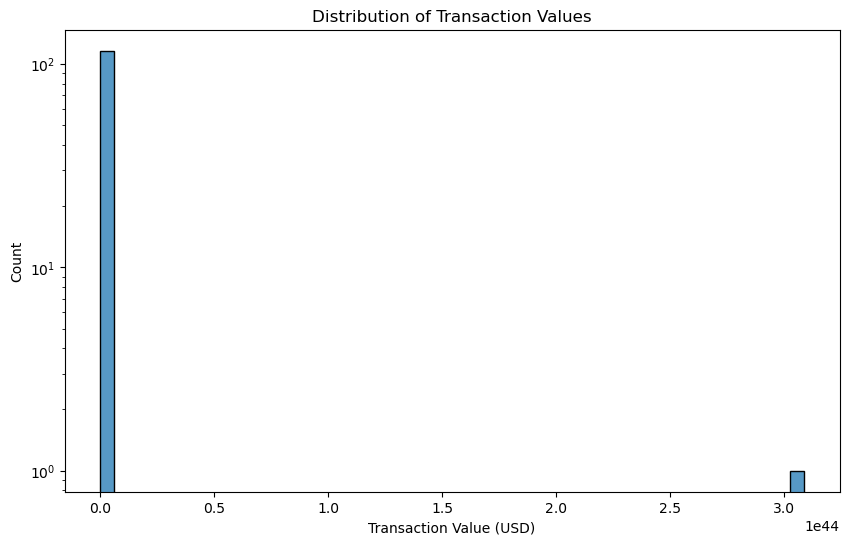

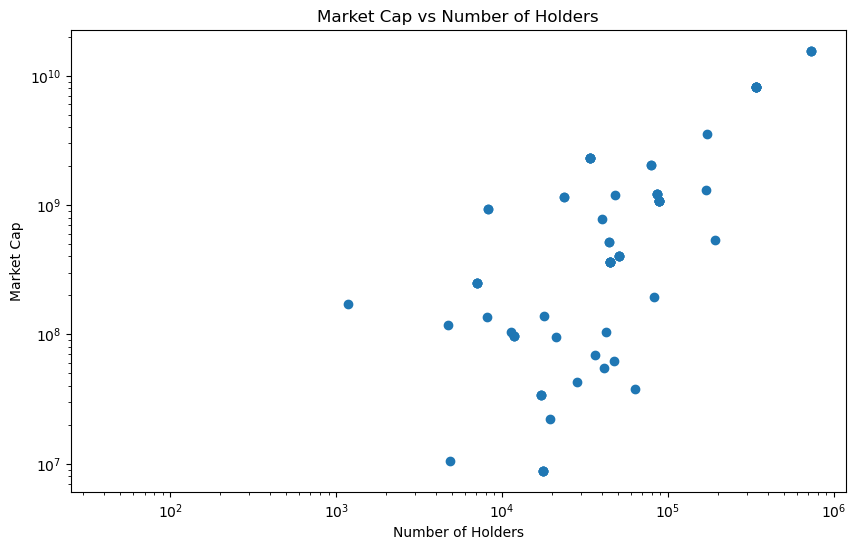

In [47]:
# 1. First, let's check what data we have
print("Columns in DataFrame:", df.columns.tolist())
print("\nSample of numeric columns:")
print(df.describe())

# 2. Clean up any remaining NaN values
df = df.fillna(0)

# 3. Add some useful derived metrics
df['transaction_value_usd'] = df['value'].astype(float) * df['dextools_price']
df['market_cap_millions'] = df['dextools_mcap'] / 1_000_000

# 4. Create a summary of tokens
token_summary = df.groupby(['tokenSymbol', 'contractAddress']).agg({
    'dextools_price': 'last',
    'dextools_mcap': 'last',
    'dextools_holders': 'last',
    'transaction_value_usd': ['count', 'sum', 'mean']
}).round(2)

print("\nToken Summary:")
print(token_summary)

# 5. Save the enriched data
df.to_csv('enriched_token_data.csv', index=False)
token_summary.to_csv('token_summary.csv')

# 6. Optional: Create some visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Transaction value distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='transaction_value_usd', bins=50)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.yscale('log')
plt.show()

# Market Cap vs Holders scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['dextools_holders'], df['dextools_mcap'])
plt.xlabel('Number of Holders')
plt.ylabel('Market Cap')
plt.title('Market Cap vs Number of Holders')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [49]:
df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,dextools_price,dextools_price5m,...,dextools_variation6h,dextools_price24h,dextools_variation24h,dextools_circulatingSupply,dextools_totalSupply,dextools_mcap,dextools_fdv,dextools_holders,transaction_value_usd,market_cap_millions
7619,2024-11-26 15:45:04,0x2588fe5c4b5dfe101a6463f6cd0789547af6260fa574...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x6982508145454ce325ddbe47a25d4ec3d2311933,0xb2170202b050f0549b9d9733f8258bc917346f98,Pepe,PEPE,55000000000000000000000000000,1.983520e-05,0.000020,...,2.434301,0.000020,-2.508206,4.137728e+14,4.137728e+14,8.210847e+09,8.210847e+09,339015.0,1.090936e+24,8210.846841
7620,2024-11-26 16:06:24,0xdd0b0b1cbd63fa9d3125cfbbc7e17bb673551fbfb10d...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x4e15361fd6b4bb609fa63c81a2be19d873717870,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Fantom Token,FTM,477980010000000000000000,1.253314e+00,0.000000,...,1.999631,1.181039,6.119648,0.000000e+00,2.138154e+09,0.000000e+00,2.679778e+09,116771.0,5.990591e+23,0.000000
7621,2024-11-26 16:08:32,0xf62d583beec60bfd53f81318e865fb9653cd8d81e417...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x4cc19356f2d37338b9802aa8e8fc58b0373296e7,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,SelfKey,KEY,40000000000000000000000000,3.702239e-03,0.000000,...,0.000000,0.000000,0.000000,6.000000e+09,6.000000e+09,2.221344e+07,2.221344e+07,19501.0,1.480896e+23,22.213436
7622,2024-11-26 16:12:48,0x72eeb9b729ea5ddfef5ae98d8e1a7f5358637d15d2c6...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x57e114b691db790c35207b2e685d4a43181e6061,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Ethena,ENA,70000000000000000000000,8.074399e-01,0.807440,...,1.816206,0.816534,-1.113696,1.479139e+09,1.500000e+10,1.191572e+09,1.208378e+10,48304.0,5.652079e+22,1191.572425
7623,2024-11-26 16:14:56,0xd77379487d65e5bc9c4f2cb45f45ee7c931d794cacfd...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x455e53cbb86018ac2b8092fdcd39d8444affc3f6,0x4fca851027b52ddcc7bbfad327a31287a00026e7,Polygon Ecosystem Token,POL,857565266927066754414145,6.906424e-01,0.690642,...,2.378401,0.633823,8.964571,6.224240e+07,1.031291e+10,4.296888e+07,7.119489e+09,28277.0,5.922709e+23,42.968883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,2024-12-03 15:21:36,0x3f9d5ad910e80effa086c926d752e4ecc652a39d55de...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x320623b8e4ff03373931769a31fc52a4e78b5d70,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Reserve Rights,RSR,52000000000000000000000000,2.166178e-02,0.000000,...,30.159030,0.009718,122.901531,5.329192e+10,1.000000e+11,1.148411e+09,2.154944e+09,23482.0,1.126413e+24,1148.410887
7732,2024-12-03 15:49:20,0xa5d3a7d582c0534a7b63a6f48cc0c09b70a3d9ed0a88...,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,0x163f8c2467924be0ae7b5347228cabf260318753,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,Worldcoin,WLD,87244250000000000000000,3.195823e+00,0.000000,...,3.997642,3.143841,1.653438,7.251462e+08,1.000000e+10,2.317439e+09,3.195823e+10,33906.0,2.788172e+23,2317.438612
7733,2024-12-03 16:04:16,0xf2587fef1cb26f5ff2bbd1ed69e113645fbad9b5fe5b...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x720cd16b011b987da3518fbf38c3071d4f0d1495,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Flux,FLUX,7000000000000,4.410638e+31,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,4.400000e+08,0.000000e+00,1.940681e+40,10649.0,3.087447e+44,0.000000
7734,2024-12-03 16:10:40,0xe3ccea13e1438d4a6e5d2c7f34ea91c56e4448f50020...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x514910771af9ca656af840dff83e8264ecf986ca,0xb2170202b050f0549b9d9733f8258bc917346f98,ChainLink Token,LINK,60000000000000000000000,2.476774e+01,0.000000,...,5.770048,24.671343,0.390742,6.268500e+08,1.000000e+09,1.551480e+10,2.475041e+10,724174.0,1.486065e+24,15514.796104


In [50]:
print(df.iloc[80])

timeStamp                                                   2024-12-01 13:49:52
hash                          0x37a274aec40499046244558f00fbf30cde56de514fd6...
from                                 0xab782bc7d4a2b306825de5a7730034f8f63ee1bc
contractAddress                      0x163f8c2467924be0ae7b5347228cabf260318753
to                                   0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9
tokenName                                                             Worldcoin
tokenSymbol                                                                 WLD
value                                                   84192660000000000000000
dextools_price                                                         3.195823
dextools_price5m                                                            0.0
dextools_variation5m                                                        0.0
dextools_price1h                                                       3.195823
dextools_variation1h                    

In [51]:
df = df[df["value"].astype(float) > 0]
df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,dextools_price,dextools_price5m,...,dextools_variation6h,dextools_price24h,dextools_variation24h,dextools_circulatingSupply,dextools_totalSupply,dextools_mcap,dextools_fdv,dextools_holders,transaction_value_usd,market_cap_millions
7619,2024-11-26 15:45:04,0x2588fe5c4b5dfe101a6463f6cd0789547af6260fa574...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x6982508145454ce325ddbe47a25d4ec3d2311933,0xb2170202b050f0549b9d9733f8258bc917346f98,Pepe,PEPE,55000000000000000000000000000,1.983520e-05,0.000020,...,2.434301,0.000020,-2.508206,4.137728e+14,4.137728e+14,8.210847e+09,8.210847e+09,339015.0,1.090936e+24,8210.846841
7620,2024-11-26 16:06:24,0xdd0b0b1cbd63fa9d3125cfbbc7e17bb673551fbfb10d...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x4e15361fd6b4bb609fa63c81a2be19d873717870,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Fantom Token,FTM,477980010000000000000000,1.253314e+00,0.000000,...,1.999631,1.181039,6.119648,0.000000e+00,2.138154e+09,0.000000e+00,2.679778e+09,116771.0,5.990591e+23,0.000000
7621,2024-11-26 16:08:32,0xf62d583beec60bfd53f81318e865fb9653cd8d81e417...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x4cc19356f2d37338b9802aa8e8fc58b0373296e7,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,SelfKey,KEY,40000000000000000000000000,3.702239e-03,0.000000,...,0.000000,0.000000,0.000000,6.000000e+09,6.000000e+09,2.221344e+07,2.221344e+07,19501.0,1.480896e+23,22.213436
7622,2024-11-26 16:12:48,0x72eeb9b729ea5ddfef5ae98d8e1a7f5358637d15d2c6...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x57e114b691db790c35207b2e685d4a43181e6061,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Ethena,ENA,70000000000000000000000,8.074399e-01,0.807440,...,1.816206,0.816534,-1.113696,1.479139e+09,1.500000e+10,1.191572e+09,1.208378e+10,48304.0,5.652079e+22,1191.572425
7623,2024-11-26 16:14:56,0xd77379487d65e5bc9c4f2cb45f45ee7c931d794cacfd...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x455e53cbb86018ac2b8092fdcd39d8444affc3f6,0x4fca851027b52ddcc7bbfad327a31287a00026e7,Polygon Ecosystem Token,POL,857565266927066754414145,6.906424e-01,0.690642,...,2.378401,0.633823,8.964571,6.224240e+07,1.031291e+10,4.296888e+07,7.119489e+09,28277.0,5.922709e+23,42.968883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,2024-12-03 15:21:36,0x3f9d5ad910e80effa086c926d752e4ecc652a39d55de...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x320623b8e4ff03373931769a31fc52a4e78b5d70,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Reserve Rights,RSR,52000000000000000000000000,2.166178e-02,0.000000,...,30.159030,0.009718,122.901531,5.329192e+10,1.000000e+11,1.148411e+09,2.154944e+09,23482.0,1.126413e+24,1148.410887
7732,2024-12-03 15:49:20,0xa5d3a7d582c0534a7b63a6f48cc0c09b70a3d9ed0a88...,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,0x163f8c2467924be0ae7b5347228cabf260318753,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,Worldcoin,WLD,87244250000000000000000,3.195823e+00,0.000000,...,3.997642,3.143841,1.653438,7.251462e+08,1.000000e+10,2.317439e+09,3.195823e+10,33906.0,2.788172e+23,2317.438612
7733,2024-12-03 16:04:16,0xf2587fef1cb26f5ff2bbd1ed69e113645fbad9b5fe5b...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x720cd16b011b987da3518fbf38c3071d4f0d1495,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Flux,FLUX,7000000000000,4.410638e+31,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,4.400000e+08,0.000000e+00,1.940681e+40,10649.0,3.087447e+44,0.000000
7734,2024-12-03 16:10:40,0xe3ccea13e1438d4a6e5d2c7f34ea91c56e4448f50020...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x514910771af9ca656af840dff83e8264ecf986ca,0xb2170202b050f0549b9d9733f8258bc917346f98,ChainLink Token,LINK,60000000000000000000000,2.476774e+01,0.000000,...,5.770048,24.671343,0.390742,6.268500e+08,1.000000e+09,1.551480e+10,2.475041e+10,724174.0,1.486065e+24,15514.796104


In [53]:
df.to_csv('token_dataframe.csv', index=False)